### Feature Scaling
Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale.

1. Normalization is a data preprocessing technique used to adjust the values of features in a dataset to a common scale. This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

2. Standardization is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.

Now, the big question in your mind must be when should we use normalization and when should we use standardization? Let’s find out!


#### Normalization          
1. Rescales values to a range between 0 and 1	
2. Useful when the distribution of the data is unknown or not Gaussian	 
3. Sensitive to outliers                        
4. Retains the shape of the original distribution	
5. May not preserve the relationships between the data points	
6. Equation: (x – min)/(max – min)	 
##### machine learning algorithms that commonly benefit from normalization:
1. k-Nearest Neighbors (k-NN): k-NN algorithms make predictions based on the similarity or distance between data points. Since the distance metric used (e.g., Euclidean distance) is sensitive to the scale of features, normalization can help ensure that all features contribute equally to the distance calculation.

2. Support Vector Machines (SVM): SVM algorithms aim to find a hyperplane that maximally separates data points of different classes. The scale of features can affect the position and orientation of the hyperplane. Normalization helps to ensure that the features have similar ranges and prevent dominance by features with larger magnitudes.

3. Neural Networks: Neural networks often use gradient-based optimization algorithms (e.g., backpropagation) to update the model's weights. Normalization can improve the convergence speed and stability of the optimization process, allowing the neural network to learn more efficiently.

4. K-Means Clustering: K-means clustering is a popular unsupervised learning algorithm that assigns data points to clusters based on their distances. Normalization ensures that all features have a comparable influence on the clustering process.

5. Self-Organizing Maps (SOM): SOM is a type of unsupervised learning algorithm that creates a low-dimensional representation of the input data. Normalizing the data helps in preserving the relative relationships between data points and improves the SOM's ability to capture meaningful patterns.

6. Hierarchical Clustering: Hierarchical clustering algorithms build a hierarchy of clusters based on the distances between data points. Normalization ensures that all features contribute equally to the clustering process.


#### Standardization
 1. Centers data around the mean and scales to a standard deviation of 1 
 2. Useful when the distribution of the data is Gaussian or unknown
 3. Less sensitive to outliers
 4. Changes the shape of the original distribution
 5. Preserves the relationships between the data points
 6. Equation: (x – mean)/standard deviation
 
  ##### some algorithms that are commonly sensitive to standardization:

1. Linear Regression: In linear regression, the coefficients of the features represent the impact or importance of each feature on the target variable. Standardizing the features ensures that the coefficients are comparable and meaningful. It prevents features with larger scales from dominating the model's learning process.

2. Logistic Regression: Similar to linear regression, standardization is beneficial in logistic regression to ensure that the coefficients of the features are on the same scale. This facilitates the interpretation of the logistic regression model and ensures fair comparisons between the features.

3. Support Vector Machines (SVM): SVM algorithms aim to find an optimal hyperplane that separates different classes. The position and orientation of the hyperplane can be affected by the scale of features. Standardizing the features helps in achieving a balanced influence of all features on the SVM model and improves its performance.

4. Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that transforms the features into a new set of orthogonal variables (principal components). The direction and magnitude of these components can be affected by the scale of features. Standardizing the features before applying PCA ensures that all features contribute equally to the principal components.

5. L1 and L2 Regularized Models: Regularization techniques, such as L1 (Lasso) and L2 (Ridge) regularization, are commonly used to prevent overfitting in models. Standardization helps ensure that the regularization penalty is applied uniformly across features and prevents the regularization term from being dominated by features with larger scales.

6. Neural Networks: Neural networks use gradient-based optimization algorithms to update the model's weights during training. These optimization algorithms can be sensitive to the scale of features, and standardizing the data helps in achieving stable and efficient convergence.


feature scaling is particularly important for algorithms that rely on distance calculations, optimization algorithms, or have a sensitivity to feature scales.
It's important to note that not all algorithms require feature scaling. Some algorithms, such as decision trees, random forests, and gradient boosting algorithms, are not affected by the scale of features.

#### Standard Scaling (Standardization)

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [18]:
df=pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [19]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [25]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

(array([ 30.,  14.,  10.,  14.,   3.,  29.,  39.,  65.,  73.,  42., 242.,
         62.,  33.,  47.,  38.,  21.,  28.,  21.,  16.,  14.,  15.,   7.,
          9.,   8.,   4.,   0.,   5.,   1.,   0.,   1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

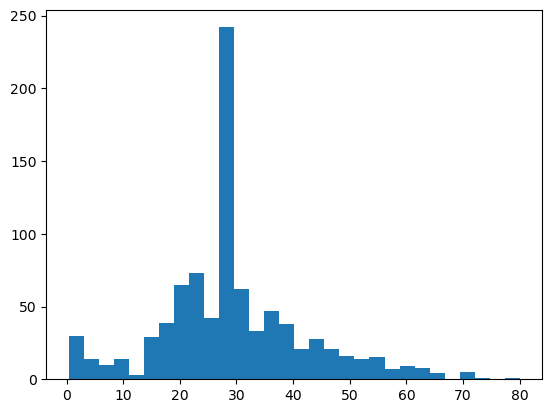

In [28]:
plt.hist(df['Age'],bins=30)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

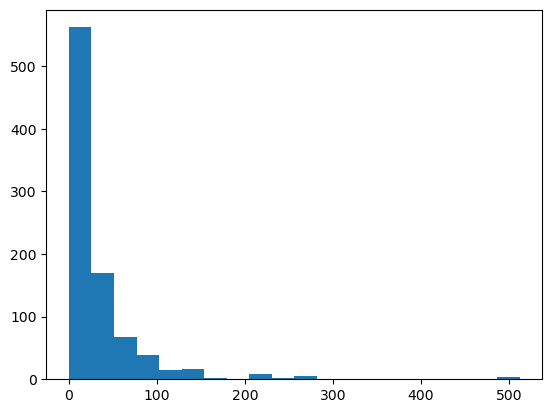

In [23]:
plt.hist(df['Fare'],bins=20)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [10]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sb

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

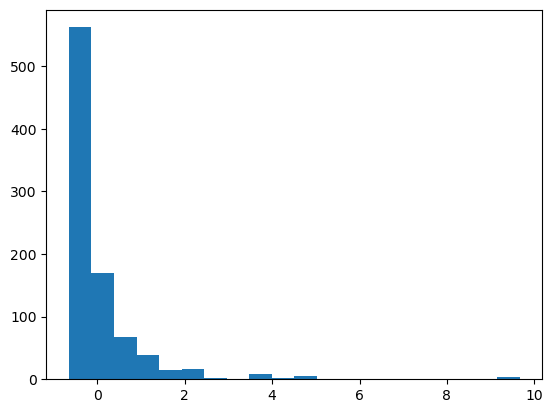

In [19]:
plt.hist(df_scaled[:,3],bins=20)

#### MinMax Scaling(Normalization)

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler().fit(df)

In [27]:
df_MinMax=pd.DataFrame(min_max.transform(df),columns=df.columns)

In [28]:
df_MinMax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 30.,  17.,  15.,   9.,  29.,  64.,  67.,  70., 260.,  62.,  51.,
         40.,  35.,  27.,  35.,  23.,  15.,   9.,  11.,  11.,   4.,   2.,
          3.,   1.,   1.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

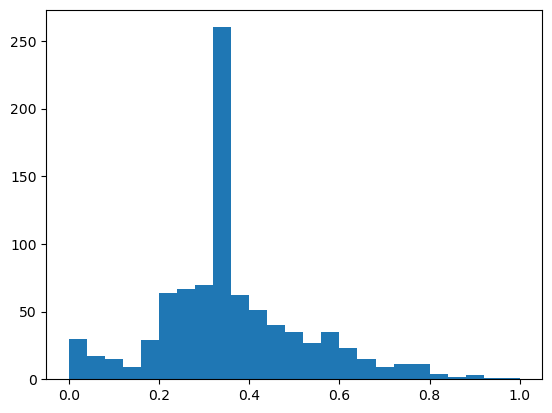

In [35]:
plt.hist(df_MinMax['Age'],bins=25)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

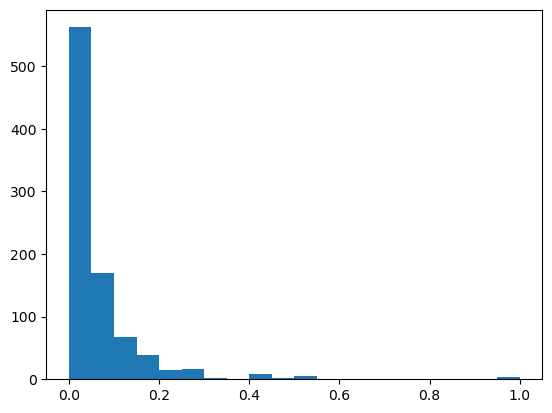

In [37]:
plt.hist(df_MinMax['Fare'],bins=20)

#### Robust scaling

In [40]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
df_robust_scaling=pd.DataFrame(robust.fit_transform(df),columns=df.columns)

In [42]:
df_robust_scaling.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


<AxesSubplot: >

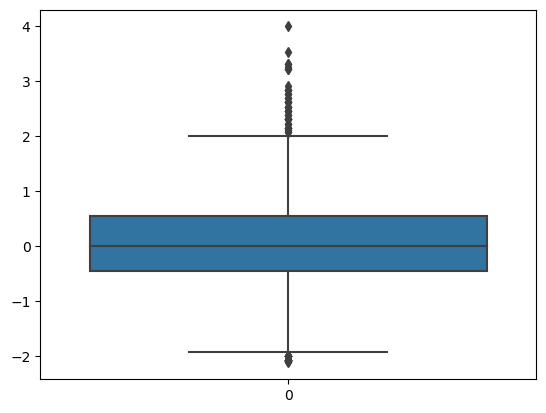

In [51]:
sb.boxplot(df_robust_scaling['Age'])

#### Feature Transformation :
It is a technique by which we can boost our model performance. Feature transformation is a mathematical transformation in which we apply a mathematical formula to a particular column(feature) and transform the values which are useful for our further analysis.
1. It is also known as Feature Engineering, which is creating new features from existing features that may help in improving the model performance.
2.  It helps machine learning algorithms to converge faster.

Some Machine Learning models, like Linear and Logistic regression, assume that the features follow a normal distribution. More likely, variables in real datasets will follow a skewed distribution.
By applying some transformations to these skewed features, we can map this skewed distribution to a normal distribution so, this can increase the performance of our models.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [6]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
data.Age.fillna(data.Age.median(),inplace=True)

In [8]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
import scipy.stats as stat
import pylab

In [10]:
#TO check the feature is guassian or normal distribution

#q-q plot

def plot_data(df,fea):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[fea])
    plt.subplot(1,2,2)
    stat.probplot(df[fea],dist='norm',plot=pylab)
    plt.show()

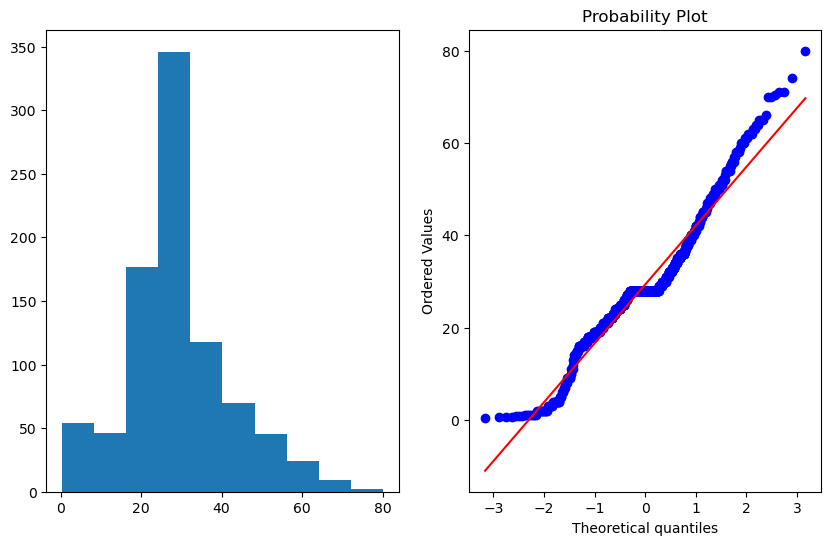

In [13]:
plot_data(data,'Age')

#if all the points are followed the line, then it will be guassian distribution 

#### Logarithmic Transformation :
 Generally, these transformations make our data close to a normal distribution but are not able to exactly abide by a normal distribution.

1. This transformation is not applied to those features which have negative values.                                                                               
2. This transformation is mostly applied to right-skewed data.

3. Convert data from addictive Scale to multiplicative scale i,e, linearly distributed data.



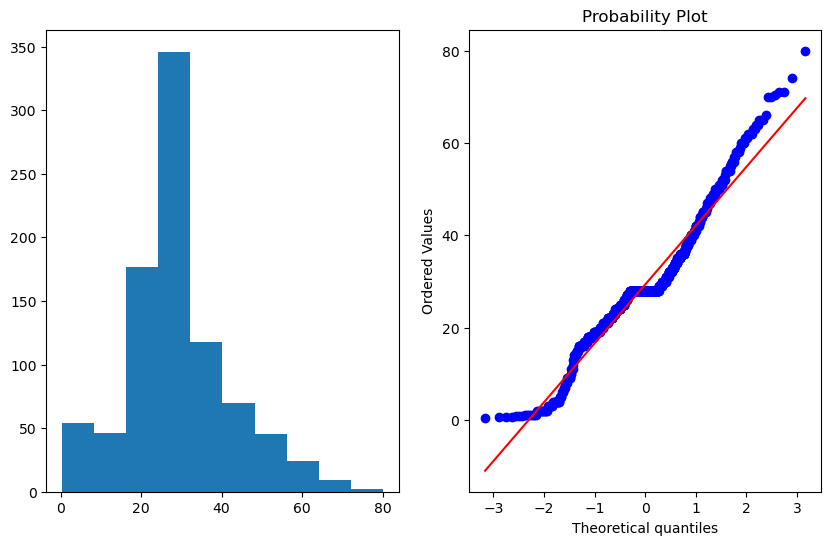

In [16]:
plot_data(data,'Age')

In [14]:
import numpy as np
data['Age_log']=np.log(data['Age'])

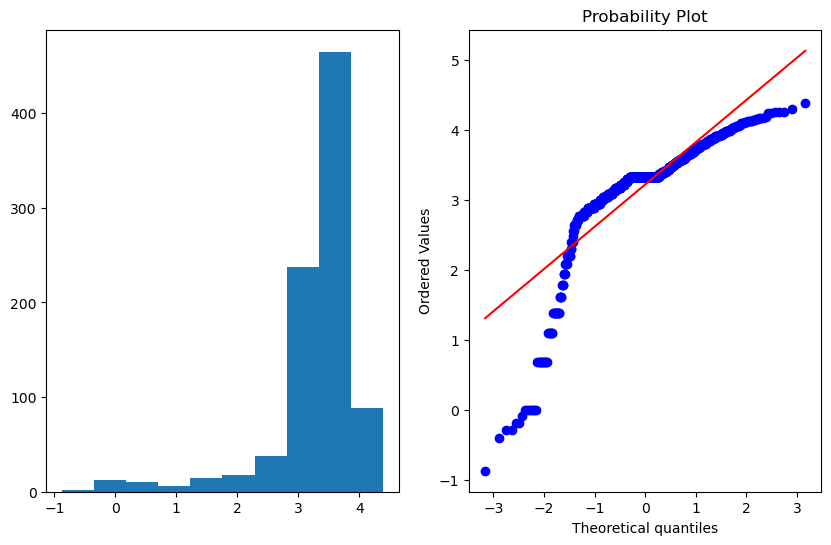

In [15]:
plot_data(data,'Age_log')

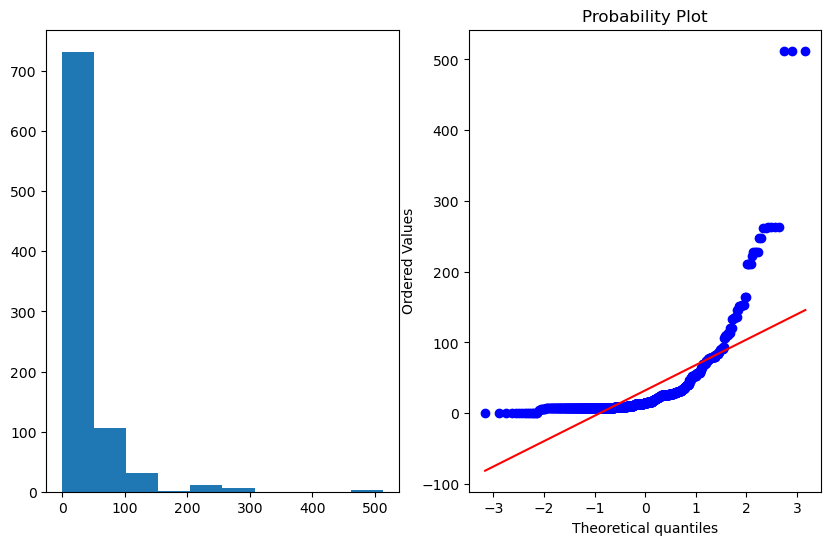

In [75]:
plot_data(data,'Fare')

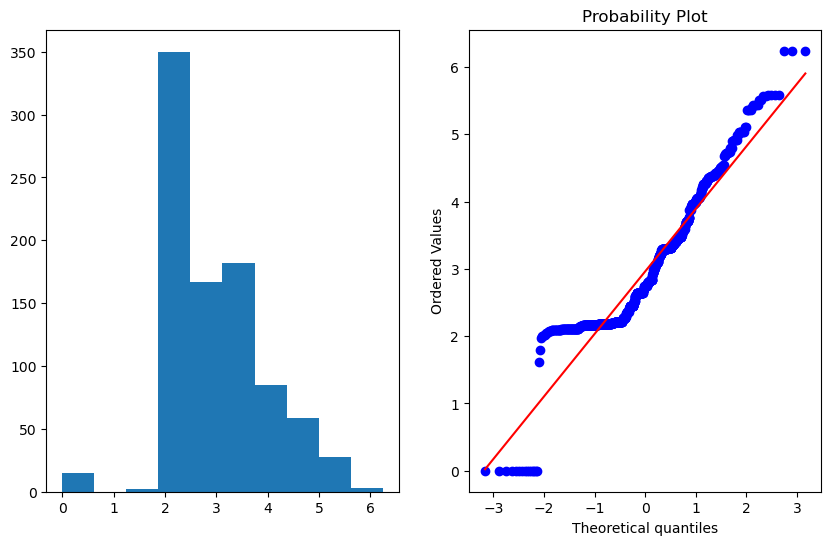

In [111]:
data['Fare_log']=np.log1p(data['Fare'])
plot_data(data,'Fare_log')

#### Reciprocal Transformation
1. This transformation is not defined for zero.

2. It is a powerful transformation with a radical effect.

3. This transformation reverses the order among values of the same sign, so large values become smaller and vice-versa.

In [78]:
data['Age_reciprocal']=1/data.Age

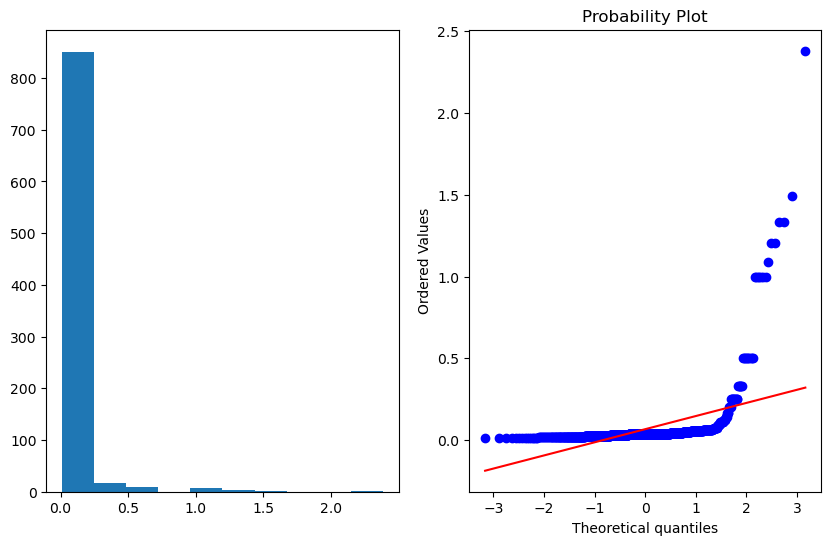

In [79]:
plot_data(data,'Age_reciprocal')

#### Square Root Transformation 
1. This transformation is defined only for positive numbers.

2. This transformation is weaker than Log Transformation.

3. This can be used for reducing the skewness of right-skewed data.

In [81]:
data['Age_sqrt']=np.sqrt(data['Age'])

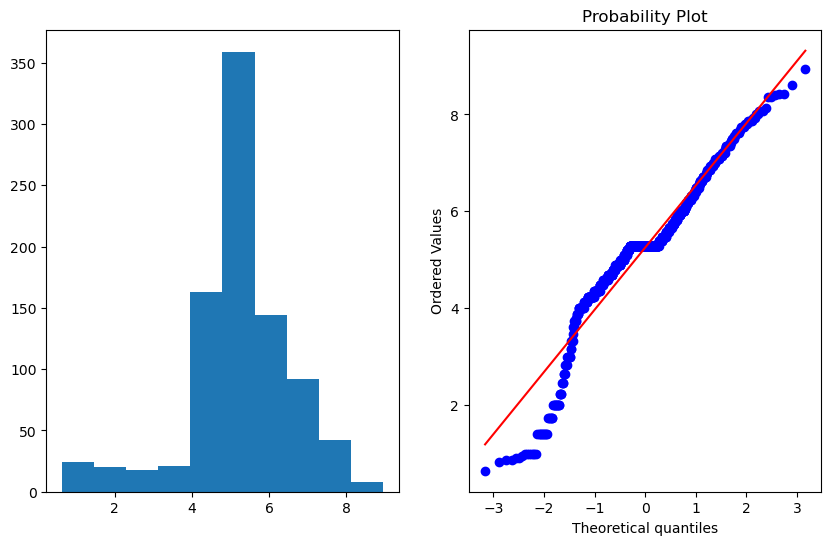

In [82]:
plot_data(data,'Age_sqrt')

#### Exponential Transformation
It is used when the feature is right skewed.

In [110]:
data['Age_exp']=np.exp(data['Age'])

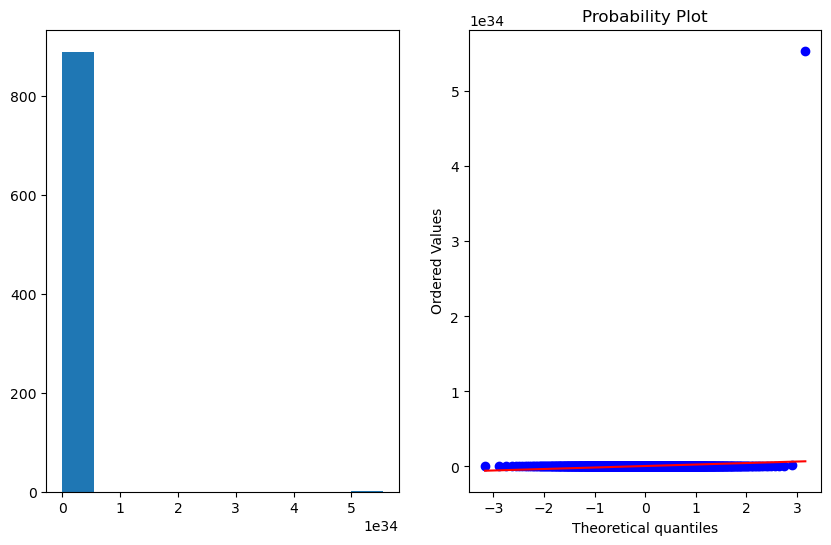

In [86]:
plot_data(data,'Age_exp')

In [87]:
data['Fare_exp']=np.exp(data['Fare'])

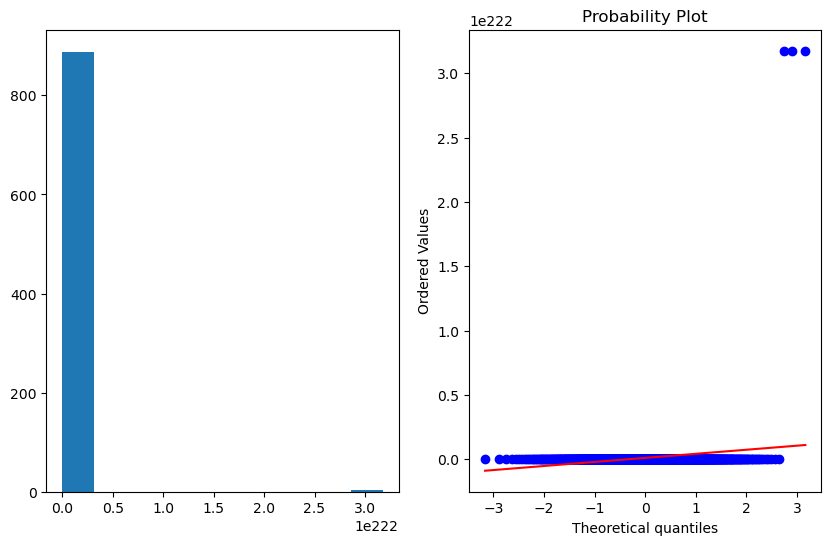

In [89]:
plot_data(data,'Fare_exp')

In [90]:
np.exp(data['Age'])

0      3.584913e+09
1      3.185593e+16
2      1.957296e+11
3      1.586013e+15
4      1.586013e+15
           ...     
886    5.320482e+11
887    1.784823e+08
888    1.446257e+12
889    1.957296e+11
890    7.896296e+13
Name: Age, Length: 891, dtype: float64

In [91]:
data.Age**(1/1.2)

0      13.142729
1      20.724608
2      15.105825
3      19.351889
4      19.351889
         ...    
886    15.588457
887    11.631293
888    16.068119
889    15.105825
890    17.959393
Name: Age, Length: 891, dtype: float64

### Guassian 

#### BoxCox Transformation
Box-cox requires the input data to be strictly positive(not even zero is acceptable).

In [102]:
data['Age_boxcox'],parameter=stat.boxcox(data['Age'])

In [103]:
parameter

0.7964531473656952

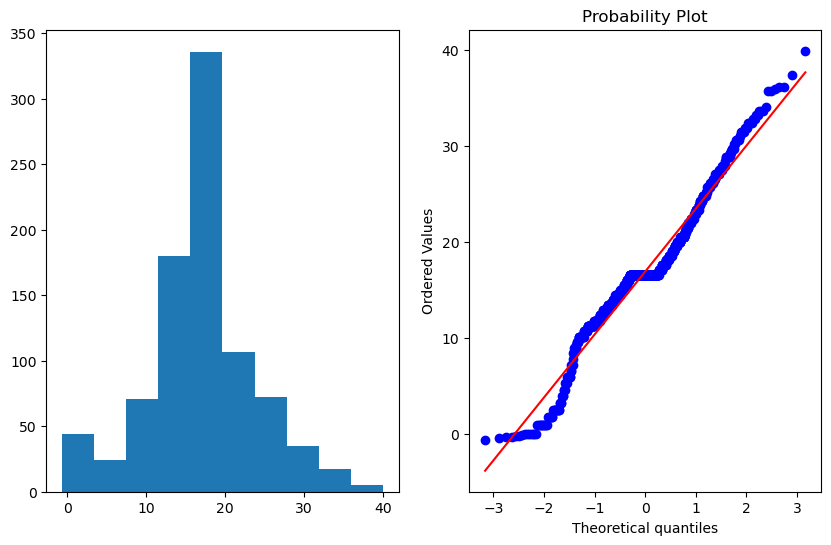

In [108]:
plot_data(data,'Age_boxcox')

In [113]:
data['Fare_boxcox'],parameter1=stat.boxcox(data['Fare']+1)

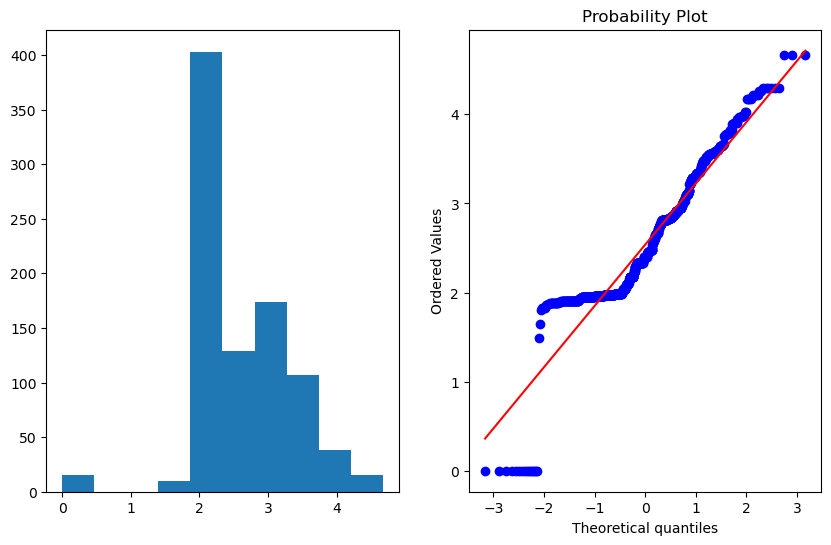

In [114]:
plot_data(data,'Fare_boxcox')

#### Difference between feature scaling and feature transformation

1. Feature scaling is the process of transforming the values of numeric features to a specific range or distribution. The primary goal of feature scaling is to ensure that all features have similar scales or magnitudes. It is particularly important for machine learning algorithms that are sensitive to the scale of features, such as distance-based algorithms (e.g., k-nearest neighbors) or gradient-based optimization algorithms (e.g., gradient descent).

2. Feature transformation involves applying mathematical functions or operations to the features to create new representations or modify their distributions. The goal of feature transformation is to improve the relationship between features and the target variable, capture non-linear patterns, reduce skewness, or satisfy specific modeling assumptions.
